# E-commerce — Выявление профилей потребления

Интернет-магазин товаров для дома «Пока все ещё тут» ищет новые точки для роста своего бизнеса. Его главная цель - стать лучше и помочь клиентам обустроить дом своей мечты. Для этого необходимо выявить потребности покупателей, а также тщательно проанализировать товарный ассортимент.
«Пока все ещё тут» — мы создаём уют!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-и-задачи" data-toc-modified-id="Цели-и-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели и задачи</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Оценка-общих-показателей-за-весь-период" data-toc-modified-id="Оценка-общих-показателей-за-весь-период-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Оценка общих показателей за весь период</a></span></li><li><span><a href="#Оценка-показателей-по-месяцам" data-toc-modified-id="Оценка-показателей-по-месяцам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Оценка показателей по месяцам</a></span></li><li><span><a href="#Категоризация-товаров-в-таблице" data-toc-modified-id="Категоризация-товаров-в-таблице-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Категоризация товаров в таблице</a></span></li><li><span><a href="#Выявление-сезонных-товаров" data-toc-modified-id="Выявление-сезонных-товаров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Выявление сезонных товаров</a></span></li></ul></li><li><span><a href="#Сегментация-покупателей-на-основе-истории-их-покупок" data-toc-modified-id="Сегментация-покупателей-на-основе-истории-их-покупок-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сегментация покупателей на основе истории их покупок</a></span><ul class="toc-item"><li><span><a href="#1.-Сегментация-по-общим-параметрам-покупок" data-toc-modified-id="1.-Сегментация-по-общим-параметрам-покупок-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>1. Сегментация по общим параметрам покупок</a></span></li><li><span><a href="#2.-Сегментация-по-товарным-категориям" data-toc-modified-id="2.-Сегментация-по-товарным-категориям-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>2. Сегментация по товарным категориям</a></span></li></ul></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#1.-Гипотеза-о-различии-в-среднем-чеке-для-разных-кластеров" data-toc-modified-id="1.-Гипотеза-о-различии-в-среднем-чеке-для-разных-кластеров-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>1. Гипотеза о различии в среднем чеке для разных кластеров</a></span></li><li><span><a href="#2.-Гипотеза-о-средней-сумме-заказов-в-октябре" data-toc-modified-id="2.-Гипотеза-о-средней-сумме-заказов-в-октябре-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>2. Гипотеза о средней сумме заказов в октябре</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Цели и задачи

Цель: Повышение эффективности бизнеса и увеличение продаж, за счет разработки более персонализированных предложений для покупателей

Задачи:

    • Исследовательский анализ данных
    • Сегментация покупателей по профилю потребления

## Исходные данные

Датасет описывает транзакции интернет-магазина товаров для дома. Согласно описанию данных мы имеем следующие поля:

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Предобработка данных


Импортируем все необходимые библиотеки. Загрузим имеющийся файл и откроем его


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


In [2]:
try:
    data = pd.read_csv('ecommerce_dataset.csv')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/ecommerce_dataset.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Мы имеем датасет, в котором 6737 записей, явных пропусков и дубликатов в нем нет. Столбцы названы понятно и оформлены в snake_case. 

Рассмотрим таблицу повнимательнее. Поле date выглядит странно. Оно представлен в формате int - его явно необходимо перевести в datetime. Помимо даты в нем указаны в конце две цифры. Чтобы разобраться, что они означают, вытащим их в отдельный столбец и переведем в int, а оставшуюся часть даты выделим атрибутом date.

In [6]:
data['num'] = data['date'].apply(lambda x: str(x)[-2:]).astype('int')
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H').dt.date
data['num'].value_counts().sort_index()

0      82
1      44
2      21
3      10
4      28
5      40
6      73
7     162
8     416
9     517
10    487
11    475
12    394
13    569
14    457
15    378
16    455
17    396
18    276
19    374
20    305
21    287
22    376
23    115
Name: num, dtype: int64

Посмотрим на гистограмму распределения значений в стобце с неизвестными цифрами.

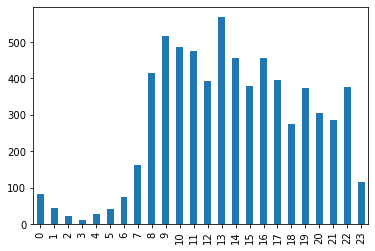

In [7]:
data['num'].value_counts().sort_index().plot(kind='bar')
plt.show()

Значения от 00 до 23, при этом с 23 до 07 встречаются редко - похоже эта цифра обозначает час совершения заказа. Переименуем столбец. 

In [8]:
data = data.rename(columns={'num': 'hour'})


Возникает вопрос, зачем в таблицу была добавлена эта информация. Вряд ли это было сделано просто так. Если бы хотели зафиксировать точное время заказа - система бы запоминала не только час, но еще и минуты и секунды. Логично предположить, что человек совершает один заказ лишь однажды - т.е. возможно всего одно значение для поля "час". Зачем он тогда нужен? Попробуем исключить это поле и снова поискать дубликаты.

In [9]:
data[[x for x in data.columns if x not in ['hour']]].duplicated().sum()

966

Рассмотрим эти записи повнимательнее.

In [10]:
data[data[[x for x in data.columns if x != 'hour']].duplicated() == True].head(20)

,date,customer_id,order_id,product,quantity,price,hour
59,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,19
60,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,20
94,2018-10-04,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0,13
126,2018-10-07,ce0e0c29-8c8b-4714-84bd-80957224d4cf,68557,Сумка-тележка хозяйственная Gimi Market синяя,1,1874.0,17
147,2018-10-08,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 15,0 л пищевой овальный ""Ekk...",1,209.0,19
148,2018-10-08,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0,19
149,2018-10-08,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 20,0 л пищевой (Минеральные ...",1,277.0,19
150,2018-10-08,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 24,0 л пищевой круглый (Иж),...",1,239.0,19
281,2018-10-17,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,Щетка для посуды *Мила* SV3182 1807009,50,27.0,13
282,2018-10-17,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,"Щетка-утюжок с ручкой Миди, Standart, York, G1126",50,44.0,13


In [11]:
data[data['order_id'] == 68474]

,date,customer_id,order_id,product,quantity,price,hour
19,2018-10-01,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,21
58,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,18
59,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,19
60,2018-10-02,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,20
63,2018-10-03,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,4


Таких дубликатов оказалось довольно много. Если вчитаться в таблицу с дубликатами, можно заметить, что одни и те же заказы повторяются в разное время в течение нескольких дней. 

Конечно, можно предположить, что человек через час после заказа гладильной доски подумал "Ух, какая скидка! Возьму еще маме", а потом еще и бабушке и всем сестрам:) 

Но таких заказов слишком много - больше похоже, на техническую ошибку. Одни и те же данные были помещены в таблицу несколько раз - а значение в поле час как раз означает, когда это произошло. Возможно, кто-то что-то неправильно обновлял и из-за этого возникло то, что мы видим. В любом случае, это нужно исправить. При этом, следует учесть, что дубликаты нужно искать не только исключая "час", но и дату, т.к. данные повторно копировались в таблицу в течение нескольких дней.

In [12]:
data[[x for x in data.columns if x not in ['hour', 'date']]].duplicated().sum()

1864

Таких дубликатов почти четверть датасета! Это большая потеря, но от них придется избавиться. Кстати, столбец "час" нам вероятно тоже больше не понадобится. Удалим все лишнее.

In [13]:
data[[x for x in data.columns if x not in ['hour', 'date']]] = (
data[[x for x in data.columns if x not in ['hour', 'date']]].drop_duplicates()
)
data = data.dropna().drop('hour', axis=1)
data['date'] = pd.to_datetime(data['date'])
data['order_id'] = data['order_id'].astype('int')
data['quantity'] = data['quantity'].astype('int')

data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Обратим внимание, что в таблице есть два столбца с количеством товара и его ценой. Для удобства работы создадим еще один столбец, куда поместим произведение этих велицин - общую сумму, которую клиент заплатил за все выбранные единицы данного товара.

In [14]:
data['sum_total'] = data['quantity'] * data['price']

Проверим, есть ли заказы, записанные более чем на одного клиента одновременно.

In [15]:
data.groupby('order_id')['customer_id'].count()[data.groupby('order_id')['customer_id'].count() > 1]

order_id
12624    2
13547    3
14480    3
14481    4
14482    2
        ..
72576    2
72778    2
72790    2
72845    4
72950    2
Name: customer_id, Length: 440, dtype: int64

Такие заказы действительно есть, и их довольно много. Однако, они не позволят нам однозначно составить профили пользователей. Удалим их из таблицы

In [16]:
not_unique_orders = data.groupby('order_id')['customer_id'].count()[data.groupby('order_id')['customer_id'].count() > 1].reset_index()['order_id']
not_unique_orders.head()

0    12624
1    13547
2    14480
3    14481
4    14482
Name: order_id, dtype: int64

In [17]:
data = data[~data['order_id'].isin(not_unique_orders)]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 7 to 6735
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2344 non-null   datetime64[ns]
 1   customer_id  2344 non-null   object        
 2   order_id     2344 non-null   int32         
 3   product      2344 non-null   object        
 4   quantity     2344 non-null   int32         
 5   price        2344 non-null   float64       
 6   sum_total    2344 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 128.2+ KB


Итак, мы провели предобработку данных и подготовили их к работе - удалили неявные дубликаты, привели столбцы к нужным типам и добавили новый столбец с общей стоимостью всех единиц товара в заказе. В результате технических ошибок больше половины данных в нашем датасете были с ошибками и нам пришлось от них избавиться, но это было необходимо. Перейдем к анализу.

## Исследовательский анализ данных (EDA)

На основе полученных данных, попробуем понять как вообще обстоят дела в интернет-магазине. Чтобы сформировать картину текущей ситации, выделим основные показатели бизнеса и изучим их динамику.



### Оценка общих показателей за весь период

Для начала, выясним, данными за какой период мы располагаем.

In [19]:
data['date'].min(), data['date'].max()


(Timestamp('2018-10-01 00:00:00'), Timestamp('2019-10-31 00:00:00'))

В нашем датасете данные за 13 месяцев - с 1 октября 2018 до 31 октября 2019.

Посмотрим, как у нас распределяются суммы покупок за весь период. Для этого построим гистограмму.


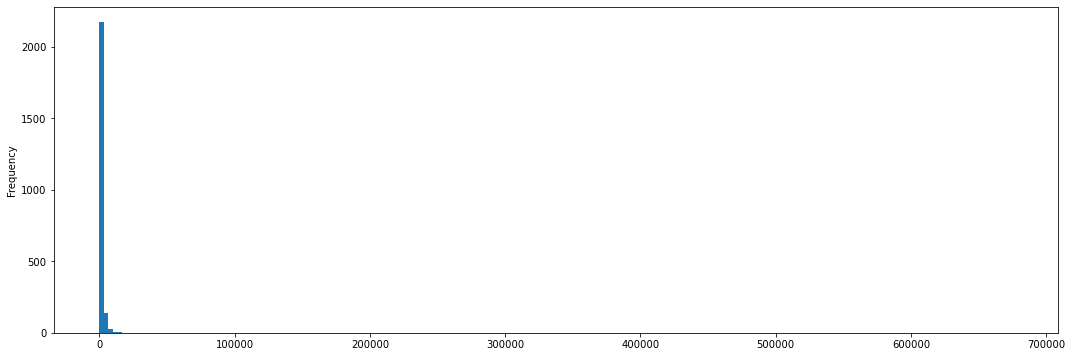

In [20]:
fig = plt.figure(figsize=(18, 6))
data.groupby('order_id')['sum_total'].sum().plot(kind='hist', bins=200)
plt.show()

In [21]:
data.groupby('order_id')['sum_total'].sum()[data.groupby('order_id')['sum_total'].sum() > 20000]


order_id
68878     24370.0
69504     32718.0
69830     47385.0
71668     49432.0
71743    675000.0
Name: sum_total, dtype: float64

Сразу можем обнаружить выброс - заказ на 675 тыс., который смещает нам график. Удалим его из основного датасета и снова посмотрим на гистограмму.

In [22]:
data = data[~data['order_id'].isin([71743])]


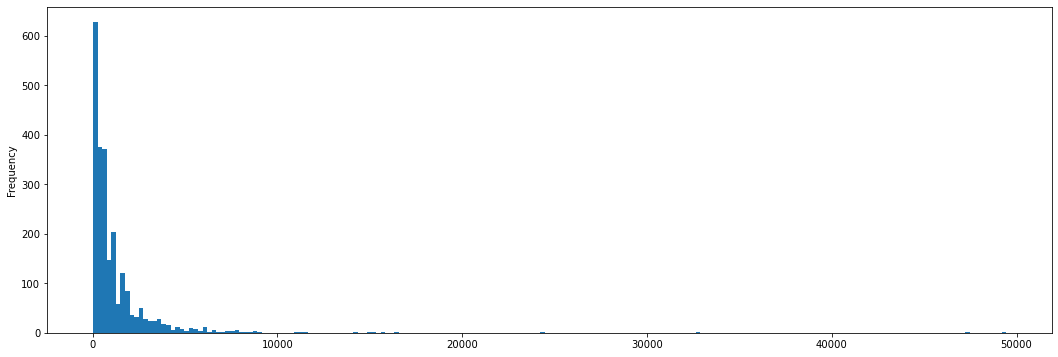

In [23]:
fig = plt.figure(figsize=(18, 6))
data.groupby('order_id')['sum_total'].sum().plot(kind='hist', bins=200)
plt.show() 

Много маленьких заказов, больших - меньше. Тут все нормально - гистограмма описывает типичное поведение покупателей. Однако по графику видно, что большинство заказов в этом магазине не превышают 10 тыс. В наших данных есть аномально крупные заказы, которые могут искажать результаты исследования. 

Однако, такие заказы и совершившие их клиенты, очень интересны магазину, т.к. приносят хорошую выручку. Они требуют "индивидуального" исследования. Сохраним их в отдельном датафрейме, чтобы не потерять, а из основного - исключим.  

In [24]:
big_orders_id = data.groupby('order_id')['sum_total'].sum()[data.groupby('order_id')['sum_total'].sum() > 10000].reset_index()['order_id']
big_orders = data[data['order_id'].isin(big_orders_id)]
data = data[~data['order_id'].isin(big_orders_id)]
big_orders.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 661 to 5992
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         13 non-null     datetime64[ns]
 1   customer_id  13 non-null     object        
 2   order_id     13 non-null     int32         
 3   product      13 non-null     object        
 4   quantity     13 non-null     int32         
 5   price        13 non-null     float64       
 6   sum_total    13 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 728.0+ bytes


In [25]:
big_orders.groupby('customer_id')['order_id'].count()

customer_id
0d87f4ae-465a-4fac-81e6-5d629761783e    1
146cd9bf-a95c-4afb-915b-5f6684b17444    1
1b2764ad-9151-4051-a46a-9b01b62e6335    1
498f12a4-6a62-4725-8516-cf5dc9ab8a3a    3
58a4c3cc-504f-43ea-a74a-bae19e665552    1
5d189e88-d4d6-4eac-ab43-fa65a3c4d106    1
6987e6d6-a63a-4ce2-a2d0-f424092d235e    1
6be74251-7159-4cc0-99fb-d034a17c61b0    1
909564b8-3a5c-4d3e-8310-5ba1c837bbd7    1
940c175f-ea87-44e0-9e16-0a3d0a9abecd    1
af4d270b-c7ae-4af5-9582-4e61ff08eff0    1
Name: order_id, dtype: int64

Это наш первый сегмент - "избранные" клиенты, которые покупают сразу очень много - скорее всего, это организации. Они важны и нужны - в интересах магазина строить с ними долгосрочное сотрудничество и мотивировать на повторные заказы. Их немного и для максимально эффективного взаимодействия с такими клиентами, неплохо было бы подобрать индивидуальный подход к каждому из них, исходя из конкретных потребностей таких заказчиков (например, это могут быть дополнительные скидки на большой чек или системы кэшбека на определенные товарные позиции).

Но вернемся к основным показателям, и рассчитаем суммарную выручку и средний чек покупок.

In [26]:
# суммарная выручка
data['sum_total'].sum()

2545854.0

In [27]:
# средний чек заказов
data.groupby('order_id')['sum_total'].sum().mean()

1092.6412017167381

Также рассмотрим такой показатель, как средняя выручка с покупателя.

In [28]:
# средняя выручка с покупателя
data.groupby('customer_id')['sum_total'].sum().mean()


1249.1923454367027

Итак, чуть больше, чем за год магазин заработал 2,54 млн., средний чек заказов составил 1092 денежных единиц, а средняя выручка с покупателя - 1249.  Это пока мало о чем нам говорит, поэтому попробуем просчитать те же показатели в разбивке по месяцам. 

### Оценка показателей по месяцам

Для удобства работы добавим в таблицу столбец с месяцем и годом и рассчитаем интересующие нас показатели.

In [29]:
data['month'] = data['date'].apply(lambda x: str(x)[:7])

In [30]:
# суммарная выручка
data.groupby('month')['sum_total'].sum()

month
2018-10    202269.0
2018-11    215001.0
2018-12    298966.0
2019-01    164847.0
2019-02    256105.0
2019-03    221253.0
2019-04    197896.0
2019-05    116214.0
2019-06    135339.0
2019-07    198806.0
2019-08    164659.0
2019-09    171479.0
2019-10    203020.0
Name: sum_total, dtype: float64

In [31]:
# средний чек заказов
data.groupby(['month', 'order_id'])['sum_total'].sum().groupby('month').mean()

month
2018-10    1264.181250
2018-11    1503.503497
2018-12    1119.722846
2019-01    1070.435065
2019-02     977.500000
2019-03    1038.746479
2019-04     979.683168
2019-05    1128.291262
2019-06    1065.661417
2019-07    1129.579545
2019-08    1010.177914
2019-09    1014.668639
2019-10    1062.931937
Name: sum_total, dtype: float64

In [32]:
# средняя выручка с покупателя
data.groupby(['month', 'customer_id'])['sum_total'].sum().groupby('month').mean()

month
2018-10    1774.289474
2018-11    1747.975610
2018-12    1371.403670
2019-01    1185.949640
2019-02    1138.244444
2019-03    1117.439394
2019-04    1075.521739
2019-05    1185.857143
2019-06    1118.504132
2019-07    1204.884848
2019-08    1055.506410
2019-09    1065.086957
2019-10    1253.209877
Name: sum_total, dtype: float64

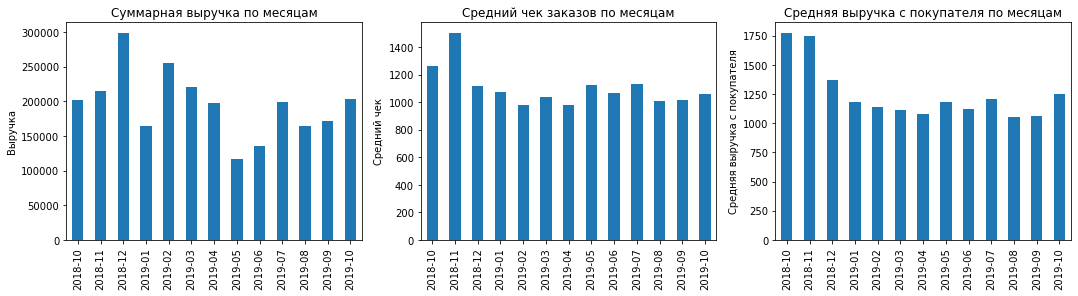

In [33]:
fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)



ax1.set_title('Суммарная выручка по месяцам')
ax2.set_title('Средний чек заказов по месяцам')
ax3.set_title('Средняя выручка с покупателя по месяцам')
       
data.groupby('month')['sum_total'].sum().plot(kind='bar', ax=ax1)
data.groupby(['month', 'order_id'])['sum_total'].sum().groupby('month').mean().plot(kind='bar', ax=ax2)
data.groupby(['month', 'customer_id'])['sum_total'].sum().groupby('month').mean().plot(kind='bar', ax=ax3)

ax1.set_xlabel('')
ax1.set_ylabel('Выручка')

ax2.set_xlabel('')
ax2.set_ylabel('Средний чек')

ax3.set_xlabel('')
ax3.set_ylabel('Средняя выручка с покупателя')

plt.show()

Динамика рассматриваемых показателей в 2019 году выглядит не очень хорошо - все они ниже, чем в последние месяцы 2018 года. При этом, средний чек и средняя выручка с покупателя снижаются плавно, а график общей выручки имеет резкие скачки. Вероятно, это связано с нестабильным количеством заказов. Проверим это предположение - посмотрим на еще один график с количеством заказов по месяцам.

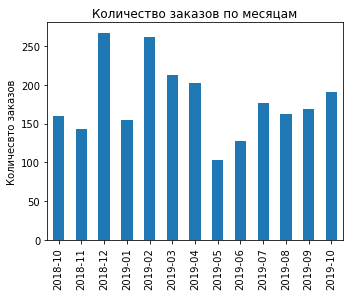

In [34]:
fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1,3,1)

ax1.set_title('Количество заказов по месяцам')

data.groupby('month')['order_id'].nunique().plot(kind='bar', ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Количесвто заказов')

plt.show()

График количества заказов по месяцам по форме очень напоминает график распределения выручки по месяцам. Это значит, что "нестабильная" выручка действительно связана с разным количеством заказов в разные месяцы.

### Категоризация товаров в таблице

Изучим товары, которые присутствуют в заказах нашего магазина. Разделим их на категории и рассмотрим, какие из них наиболее популярны. Кроме того, попробуем выяснить, есть ли какие-то закономерности в их продажах.

In [35]:
data['product'].nunique()


1361

Столбец с названиями товаров содержит более 1,3 тыс. записей. Для того, чтобы разделить товары по категориям сформируем несколько словарей с ключевыми словами и реализуем функцию, которая будет искать в названии товара ключевое слово и на основании этого определять его в соответствующую категорию. Названия категорий поместим в новый столбец.


In [36]:
def category_func(product_name):
    dict = {'Дом и интерьер': ['урна', 'полк', 'светильник', 'прищеп','тележк','хозяйственн', 'чехол','обув',  'насадк', 'сушилк', 'крючок',  'мусор',   'весы', 'вешал', 'гладильн'],
            'Кухня': ['чистка', 'сахар', 'attribute', 'миска', 'салатник', 'для выпечки', 'кондитерск', 'luminarc','круж', 'вилка', 'ложка', 'тарелка', 'банка', 'блюд', 'нержавеющ', 'полимербыт','чайник', 'для кухни', 'емкость', 'нож', 'кастрюля', 'кухонн', 'кувшин', 'бокал','столовы', 'стакан', 'фужер', 'сковород' ],
            'Ванная комната': ['мыл', 'зубн', 'для ванн'],  
            'Уборка и ремонт':['совок', 'шпингалет', 'средство', 'короб', 'корзин', 'ящик', 'кофр', 'хранени','ведр', 'таз', 'щетк','перчатки', 'швабра', 'веник', 'ерш', 'уборк', 'стремянк', 'крепеж', 'петл', 'стяжк', 'пружина', 'сверло', 'сварка'],
            'Текстиль и ковры':['постель', 'одеяло', 'подушк','флис','салфет','наволоч', 'плед', 'простын', 'покрывал', 'скатерт', 'полотен', 'ковер', 'коврик'],
            'Искусственные цветы и муляжи': ['искуственн', 'искусственн', 'муляж'],
            'Растения': ['рассада', 'растение', 'd-', 'объем', 'диам.', 'цветущ', 'горш', 'кашпо', 'в кассете', 'черен', 'пеларгония']
            }
    res = 'Другое'
    product_name = product_name.lower().replace('ё', 'е')
            
    for key, value in dict.items():
        for i in value:
            if i in product_name:
                res = key
                return res
    if (product_name[-13:].isdigit()) and (product_name[-16:-13] == ' г '):
        res = 'Растения'
        
    return res

In [37]:
data['category'] = data['product'].apply(category_func)


In [38]:
data.head(20)

,date,customer_id,order_id,product,quantity,price,sum_total,month,category
7,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,2018-10,Дом и интерьер
8,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0,269.0,2018-10,Уборка и ремонт
9,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,674.0,2018-10,Дом и интерьер
10,2018-10-01,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,Вешалка для брюк металлическая с резиновым пок...,10,82.0,820.0,2018-10,Дом и интерьер
11,2018-10-01,86432d8d-b706-463b-bd5d-6a9e170daee3,68484,Сушилка для белья потолочная Zalger Lift Basic...,1,614.0,614.0,2018-10,Дом и интерьер
12,2018-10-01,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,187.0,2018-10,Дом и интерьер
13,2018-10-01,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,Крючок одежный 2-х рожковый серый металлик с п...,96,38.0,3648.0,2018-10,Дом и интерьер
14,2018-10-01,a576fa59-7b28-4a4c-a496-92f128754a94,68487,"Корзина мягкая пластиковая 17 л, М-пластика, M...",1,188.0,188.0,2018-10,Уборка и ремонт
19,2018-10-01,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10,Дом и интерьер
20,2018-10-02,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.0,1162.0,2018-10,Дом и интерьер


Итак, товары разделены на 8 категорий (в последнюю категорию "Другое" попали товары, которые не удалось опознать по выбранным ключевым словам). Посмотрим, в каком соотношении они разделились.

In [39]:
category_pivot = data.groupby('category')['sum_total'].agg(['count', 'sum']).reset_index()
category_pivot


,category,count,sum
0,Ванная комната,114,145291.0
1,Дом и интерьер,928,1440973.0
2,Другое,143,116904.0
3,Искусственные цветы и муляжи,174,80182.0
4,Кухня,225,199553.0
5,Растения,419,157588.0
6,Текстиль и ковры,126,159700.0
7,Уборка и ремонт,201,245663.0


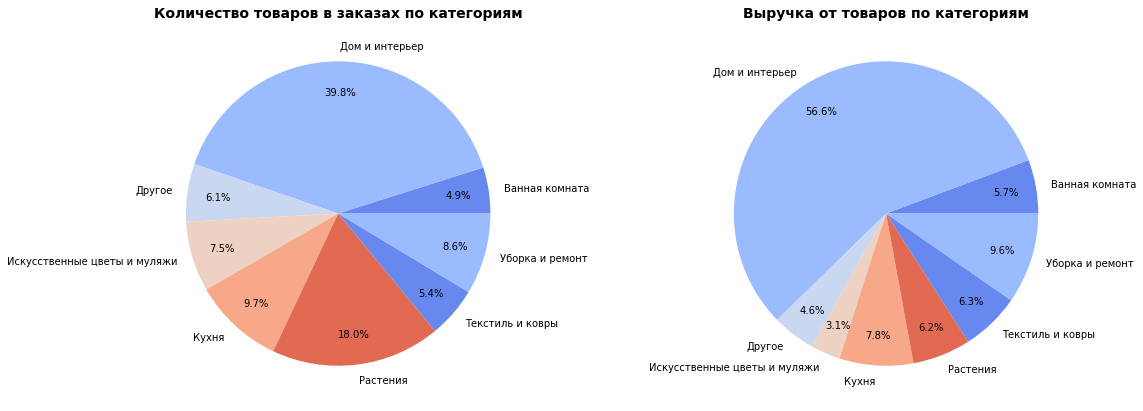

In [40]:
fig = plt.figure(figsize=(18, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('Количество товаров в заказах по категориям',
             fontsize = 14,  fontweight='bold', loc = 'center'
            )
ax1.pie(category_pivot['count'],
        colors=sns.color_palette("coolwarm"),
        autopct='%1.1f%%',
        pctdistance=0.8,
        labels=category_pivot['category']
        
       )

ax2.set_title('Выручка от товаров по категориям',
             fontsize = 14,  fontweight='bold', loc = 'center'
            )
ax2.pie(category_pivot['sum'],
        colors=sns.color_palette("coolwarm"),
        autopct='%1.1f%%',
        pctdistance=0.8,
        labels=category_pivot['category']
    
       )


plt.show()

Около 40% товаров в заказах - из категории "Дом и интерьер". Это самые популярные товары ассортимента данного магазина. Еще около 18% приходится на "Растения", 10% на товары для кухни. Остальные категории занимают от 9 до 5 %. 

При этом больше половины выручки получено в категории "Дом и интерьер", а остальные категории лишь вносят свой небольшой вклад по выручке в пределах 3-10%.

### Выявление сезонных товаров

Интересно посмотреть, есть ли какие-то различия в продаже товаров из разных категорий в течение года. Выясним это - построим столбчатые диаграммы распределения суммарных продаж товаров каждой категории.

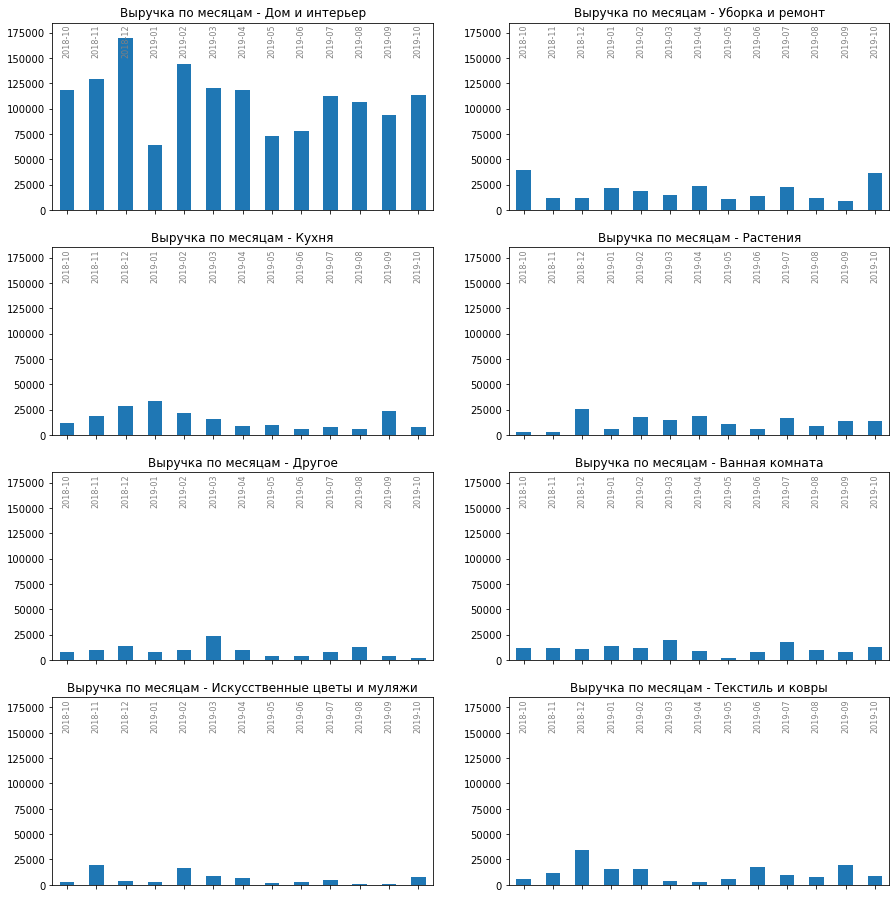

In [41]:
fig = plt.figure(figsize=(15, 20))

i = 0
for category in data['category'].unique():
    i+=1
    ax=fig.add_subplot(5,2,i)
    data[data['category'] == category].groupby('month')['sum_total'].sum().plot(kind='bar', ax=ax, ylim = (0, 185000))
    ax.set_title('Выручка по месяцам - ' + category)
    ax.set_xlabel(' ')
    ax.tick_params(axis = 'x', pad = -190, labelsize = 8, labelcolor = 'gray',)  
   
    
plt.show()

По категориям "Ванная", "Другое"ситуация выглядит относительно стабильной: все товары покупаются в течение всего года примерно одинаково. 

В категории "Растения" явно выделяются февраль, март и апрель - ничего удивительного, весна - самое время покупать семена и рассаду. Кроме того, есть товары с повышенным спросом в декабре - вероятно, это новогодние и рождественские деревья. Таким образом - это первый сезонный товар.

В категории "Уборка и ремонт" заметно увеличение продаж в октябре. Видимо, в этот период люди возвращаются из отпусков и решают приводить дом в порядок к Новому году.

В категории "Дом и интерьер" на графике есть "яма" - январь 2019 года. Можно предположить, что декабрь и февраль - время покупки подарков к Новому году и 8 марта. 

"Текстиль и ковры" пользуются спросом перед новым годом - вероятно, тоже в качестве подарков.

Товары для кухни активно покупают в декабре и январе - что еще делать зимними вечерами, если не готовить вкусняшки.

Добавим в таблицу столбец, куда поместим метку, является ли покупка сезонной. Для этого напишем функцию.

In [42]:
def func_seasonal(row):
    res = False
    if ((row['category'] == 'Растения') & (row['month'] in ['2018-12', '2019-02', '2019-03', '2019-04'])) | \
    ((row['category'] == 'Уборка и ремонт') & (row['month'] in ['2018-10', '2019-10'])) | \
    ((row['category'] == 'Дом и интерьер') & (row['month'] in ['2018-12', '2019-02'])) |\
    ((row['category'] == 'Текстиль и ковры') & (row['month'] in ['2018-12'])) |\
    ((row['category'] == 'Кухня') & (row['month'] in ['2018-12', '2019-01'])):
        res = True
    return res
        

In [43]:
data['seasonal'] = data.apply(func_seasonal, axis=1)
data.head(10)

,date,customer_id,order_id,product,quantity,price,sum_total,month,category,seasonal
7,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,2018-10,Дом и интерьер,False
8,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0,269.0,2018-10,Уборка и ремонт,True
9,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,674.0,2018-10,Дом и интерьер,False
10,2018-10-01,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,68483,Вешалка для брюк металлическая с резиновым пок...,10,82.0,820.0,2018-10,Дом и интерьер,False
11,2018-10-01,86432d8d-b706-463b-bd5d-6a9e170daee3,68484,Сушилка для белья потолочная Zalger Lift Basic...,1,614.0,614.0,2018-10,Дом и интерьер,False
12,2018-10-01,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,187.0,2018-10,Дом и интерьер,False
13,2018-10-01,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,Крючок одежный 2-х рожковый серый металлик с п...,96,38.0,3648.0,2018-10,Дом и интерьер,False
14,2018-10-01,a576fa59-7b28-4a4c-a496-92f128754a94,68487,"Корзина мягкая пластиковая 17 л, М-пластика, M...",1,188.0,188.0,2018-10,Уборка и ремонт,True
19,2018-10-01,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0,3299.0,2018-10,Дом и интерьер,False
20,2018-10-02,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.0,1162.0,2018-10,Дом и интерьер,False


Мы изучили основные показатели продаж магазина за год по месяцам и узнали, какие категории товаров пользуются наибольшим спросом. Кроме того, мы выявили сезонные товары. Попробуем узнать, как с помощью этих данных повысить эффективность работы магазина. Для этого проанализируем поведение покупателей - сегментируем клиентов, основываясь на истории их покупок. 

## Сегментация покупателей на основе истории их покупок 

### 1. Сегментация по общим параметрам покупок 

Для начала, разделим покупателей по таким критериям:

- частота заказов
- средняя сумма покупок
- среднее количество товаров в заказе
- частота сезонных покупок

Создадим новую таблицу, куда поместим все перечисленные данные. 

In [44]:
# сначала получим общее число заказов пользователя и количество месяцев, когда он их совершал
customers = data.groupby('customer_id')['order_id'].nunique().reset_index().rename(columns={'order_id': 'orders_total'})
customers['months_total'] = data.groupby('customer_id')['month'].nunique().reset_index()['month']
# вычисли среднюю частоту заказов, разделив количество заказов на количество месяцев
customers['order_frequency'] = customers['orders_total'] / customers['months_total']
# вычислим среднюю сумму покупок, разделив общую сумму на количесвто заказов
customers['sum_avg'] = data.groupby('customer_id')['sum_total'].sum().reset_index()['sum_total'] / customers['orders_total']
# вычислим среднее количество товаров в заказе
customers['quantity_avg'] = data.groupby('customer_id')['quantity'].sum().reset_index()['quantity'] / customers['orders_total']
# вычислим частоту сезонных покупок
customers['seasonal'] = data.groupby('customer_id')['seasonal'].sum().reset_index()['seasonal'] / data.groupby('customer_id')['seasonal'].count().reset_index()['seasonal']
customers.head(10)

,customer_id,orders_total,months_total,order_frequency,sum_avg,quantity_avg,seasonal
0,001cee7f-0b29-4716-b202-0042213ab038,1,1,1.0,442.0,1.0,1.0
1,00299f34-5385-4d13-9aea-c80b81658e1b,1,1,1.0,914.0,2.0,0.0
2,002d4d3a-4a59-406b-86ec-c3314357e498,1,1,1.0,1649.0,1.0,0.0
3,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1,1.0,2324.0,2.0,0.0
4,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1,1,1.0,1536.0,12.0,0.0
5,005ba170-45e8-42de-93f7-192481ae2659,1,1,1.0,1199.0,1.0,0.0
6,00bd74b1-2792-47db-a2f1-680a09ac5026,1,1,1.0,937.0,1.0,0.0
7,00c0f92a-121a-4883-a78d-2c7b5fe187de,1,1,1.0,134.0,1.0,1.0
8,00cd704a-a65c-4865-b39a-779f1b4f1d1a,1,1,1.0,112.0,1.0,1.0
9,00e59a12-06d5-47fc-9a33-bfc53aca1e9f,1,1,1.0,1798.0,2.0,0.0


Визуализируем соотношение частоты заказов и среднего чека покупателей на диаграмме рассеяния.

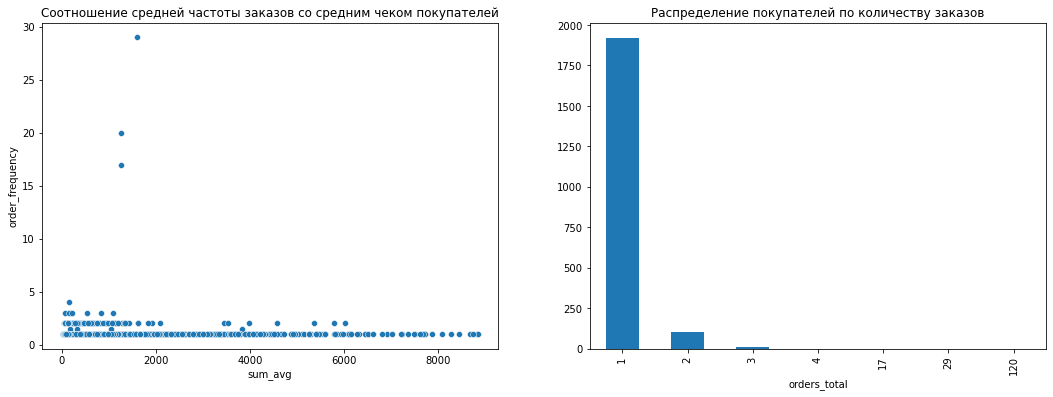

In [45]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.scatterplot(data=customers,
                x='sum_avg',
                y='order_frequency',
                ax=ax1
                )
ax1.set_title('Соотношение средней частоты заказов со средним чеком покупателей')

customers.groupby('orders_total')['customer_id'].count().plot(kind='bar', ax=ax2)
ax2.set_title('Распределение покупателей по количеству заказов')

plt.show()


На диаграмме рассеяния большинство точек на графике скопились у значения частоты заказов = 1. Это те клиенты, которые совершили единственную покупку в магазине (второй график это подтверждает). Здесь для нас важно понять - это просто новые клиенты, которые только недавно попали в магазин и еще не успели купить больше, или это явный отток - люди, которые пропали навсегда и не планируют возвращаться. Для того, чтобы это выяснить, добавим в таблицу еще один столбец с давностью последней покупки (в месяцах).

In [46]:
customers = customers.merge(data.groupby('customer_id')['month'].max().reset_index(),
                                          on='customer_id'
                                         ).rename(columns={'month': 'last_order'})
customers['last_order'] = customers['last_order'].apply(lambda x: sorted(data['month'].unique(), reverse=True).index(x))
customers.head()

,customer_id,orders_total,months_total,order_frequency,sum_avg,quantity_avg,seasonal,last_order
0,001cee7f-0b29-4716-b202-0042213ab038,1,1,1.0,442.0,1.0,1.0,8
1,00299f34-5385-4d13-9aea-c80b81658e1b,1,1,1.0,914.0,2.0,0.0,0
2,002d4d3a-4a59-406b-86ec-c3314357e498,1,1,1.0,1649.0,1.0,0.0,9
3,003bbd39-0000-41ff-b7f9-2ddaec152037,1,1,1.0,2324.0,2.0,0.0,1
4,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1,1,1.0,1536.0,12.0,0.0,9


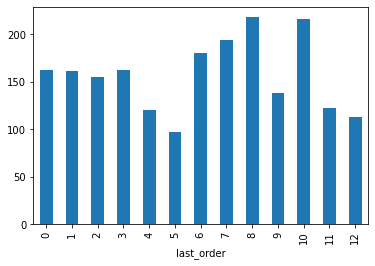

In [47]:
customers.groupby('last_order')['customer_id'].count().plot(kind='bar')
plt.show()

Этот график практически зеркально отображает график "Суммарной выручки по месяцам", который мы строили, когда оценивали показатели по месяцам. Получается, что падение выручки связано с невозвратом клиентов. Возможно, в период, когда выручка была большой, проводились какие-то мероприятия по привлечению клиентов - реклама или промо-акции. В результате чего, наблюдалось не только увеличение выручки, но и приток "одноразовых" клиентов, которые больше не вернулись. Если это действительно так, то возможно компании стоит проанализировать этот вопрос и принять соответствующие решения.

Далее произведем сегментацию клиентов, используя популярные алгоритмы машинного обучения. Сначала построим дендрограмму на основе агломеративной иерархической кластеризации, а после оценки оптимального числа кластеров запустим алгоритм K-Means.

In [48]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(customers[['order_frequency', 'sum_avg', 'quantity_avg', 'seasonal', 'last_order']]) # обучаем нормализатор и преобразуем набор данных 

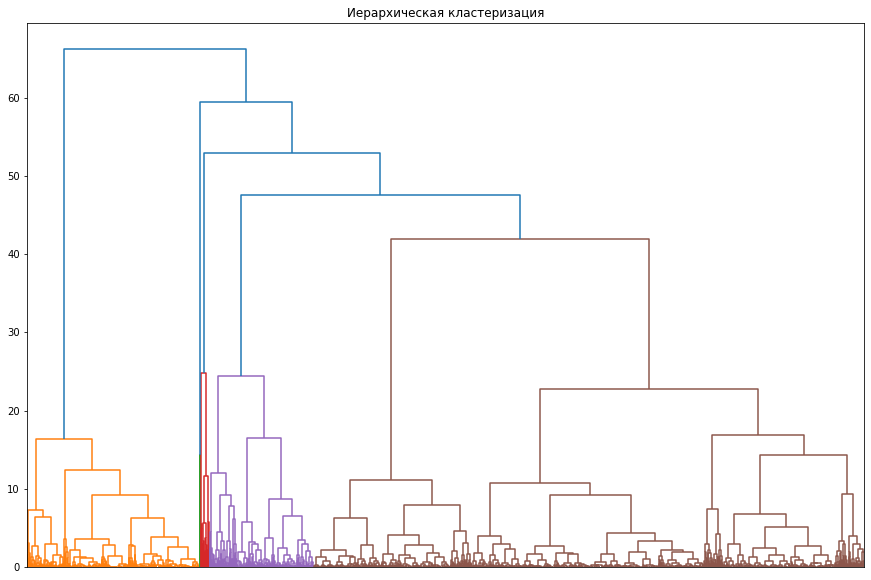

In [49]:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Иерархическая кластеризация')
plt.show() 

In [50]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0) 
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
customers['cluster'] = labels


# выводим статистику по средним значениям наших признаков по кластеру
print(round(customers.groupby('cluster').mean(),3))


         orders_total  months_total  order_frequency   sum_avg  quantity_avg  \
cluster                                                                        
0               1.056         1.005            1.050  1116.398         2.981   
1               1.062         1.016            1.044  1014.784         2.084   
2              55.333         2.667           22.000  1364.175         3.052   
3               1.000         1.000            1.000  4128.933       102.667   
4               1.072         1.012            1.059  1046.632         2.255   

         seasonal  last_order  
cluster                        
0           0.000       8.669  
1           0.997       8.441  
2           0.305       6.333  
3           0.133       6.133  
4           0.001       2.290  


Итак, мы получили пять кластеров. Посмотрим, сколько покупателей попало в каждый кластер:
    

In [51]:
customers.groupby('cluster')['customer_id'].count()

cluster
0    753
1    433
2      3
3     15
4    834
Name: customer_id, dtype: int64

И визуализируем распределение признаков полученных кластеров с помощью диаграмм размаха.

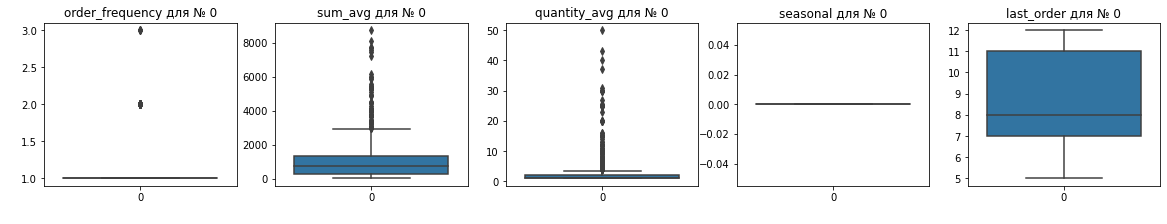

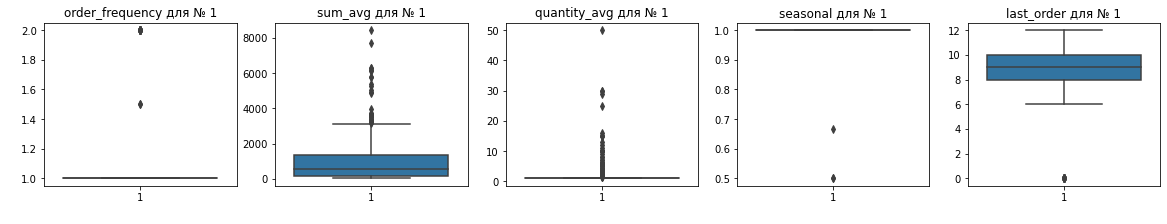

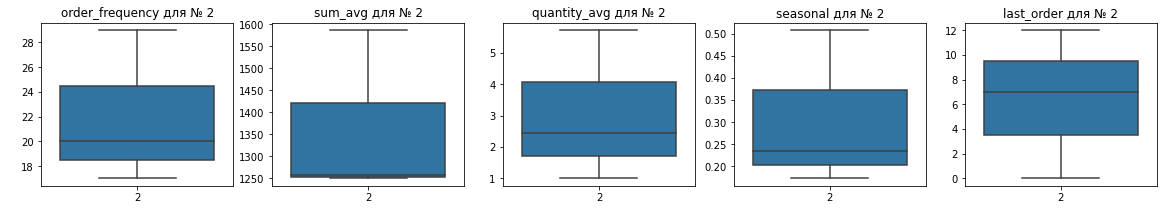

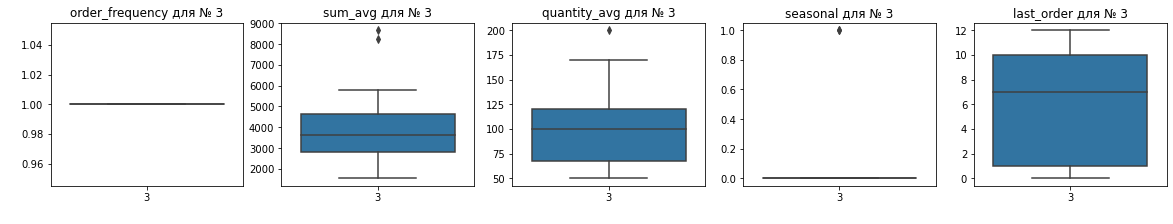

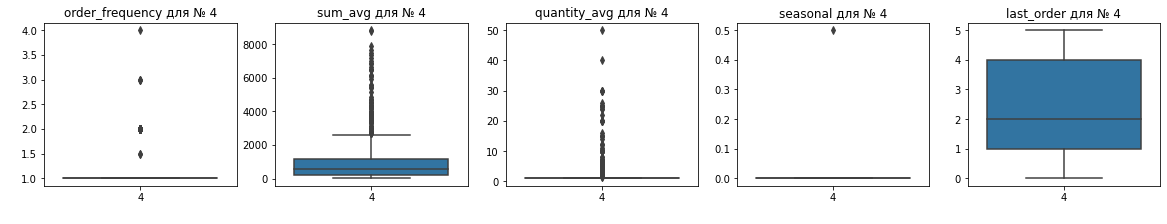

In [52]:

for cluster in range(5):
     
    fig = plt.figure(figsize=(20, 3))

    i = 0
    for col in ['order_frequency', 'sum_avg', 'quantity_avg', 'seasonal', 'last_order']:
        i+=1
        ax=fig.add_subplot(1,5,i)
        sns.boxplot(data=customers[customers['cluster'] ==cluster],
                    x='cluster',
                    y=col,        
                    ax=ax
                    )
        ax.set_title(col+ ' для № '+ str(cluster))  
        ax.set_xlabel(' ')
        ax.set_ylabel(' ')
        
plt.show()


Проанализировав диаграммы размаха, можем  сформулировать следующие наблюдения о "средних" представителях этих кластеров:

           
    - 0 -  Сюда попали клиенты, которые однократно совершили небольшую покупку НЕ сезонного товара больше полугода назад. Вероятно, это те люди которые случайно попали на сайт(скорее всего из поисковика или после какой-то промо-акции), купили то, что хотели и больше не заказывали. Таких клиентов надо "возвращать" - хорошая стратегия "заманить" их обратно - предложение дополнительных скидок на весь ассортимент, т.к. однократная покупка не позволяет нам точно понять потребности таких клиентов.
    
     - 1 - Это клиенты, которые давно совершили единственную покупку сезонных товаров. Их можно попробовать вернуть дополнительными скидками на ту же категорию товаров в следующем году.
   
      - 2 - В этот кластер попало совсем мало клиентов. Это клиенты, которые покупают не очень много и не привязываются к сезонным товарам, НО в отличие от всех остальных, они имеют бОльшую частоту заказов, т.е. склонны периодически возвращаться и делать заказы. Они уже имеют доверие к магазину, поэтому главная задача здесь - не потерять его. Для этих людей может быть интересна система кэшбека на следующую покупку или скидочные сертификаты ( тоже на следующую покупку и, естественно, с ограниченным сроком действия) - это смотивирует их возвращаться еще чаще. В целом, такие акции можно предложить всем клиентам, кто уже совершал несколько повторных заказов. 
      
      - 3 - Этот кластер - это клиенты, имеющие бОльший средний чек, по сравнению с остальными. В их заказах больше позиций товаров, а значит их  могут заинтересовать акции на количество товаров в чеке (из серии купи два, третий получи в подарок или со скидкой), а также система кэшбека на следующую покупку - чем больше купил, тем больше получил баллами на следующий заказ.
        
    - 4 - Последний кластер по всем признакам похож на кластер №0 (однократный заказ несезонных товаров на небольшую сумму) с одним важным отличием -  большинство из этих клиентов совершили последнюю покупку меньше 4 месяцев назад. Т.е. они еще не безнадежно потеряны для магазины и вполне могут вернуться. Здесь магазину имеет смысл поработать над выявлением потребностей клиентов: например, запустить акцию, где клиент сам выберет 1-2 категории товаров, на которые хочет получать дополнительную скидку. Этот кластер получился самым многочисленным - это значит, что он обладает большим потенциалом и при правильной работе с ним, может принести магазину хорошую выручку.
        
    
    

    
  


### 2. Сегментация по товарным категориям

Для начала узнаем, покупки по скольким категориям товаров имеют пользователи.  

In [53]:
data.groupby('customer_id')['category'].nunique().value_counts()

1    2020
2      13
3       2
6       1
5       1
8       1
Name: category, dtype: int64

Любопытно, что подавляющее большинство покупает товары только в одной категории, совсем немного людей - в 2-3, и лишь единицы в 4 категориях и больше. Разделим пользователей по сегментам, исходя из этого признака.

In [54]:
# добавим в датафрейм data столбец с номером кластера клиента
data = data.merge(customers[['customer_id', 'cluster']], on='customer_id')
data.head()    

,date,customer_id,order_id,product,quantity,price,sum_total,month,category,seasonal,cluster
0,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0,2018-10,Дом и интерьер,False,0
1,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0,269.0,2018-10,Уборка и ремонт,True,1
2,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,674.0,2018-10,Дом и интерьер,False,2
3,2018-10-02,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.0,1162.0,2018-10,Дом и интерьер,False,2
4,2018-10-03,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,Набор прищепок большие пластиковые ROZENBAL ПИ...,10,86.0,860.0,2018-10,Дом и интерьер,False,2


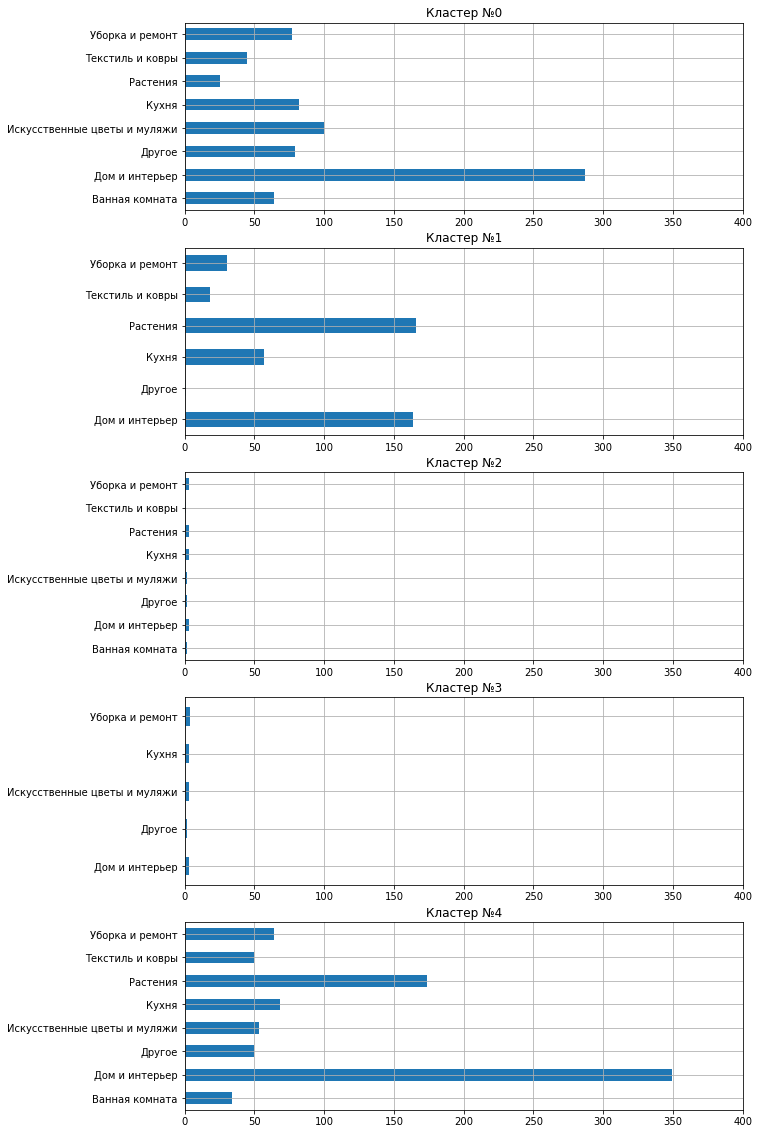

In [55]:
fig = plt.figure(figsize=(10, 20))

for cluster in range(5):
    ax=fig.add_subplot(5,1,cluster+1)
    data[data['cluster'] == cluster].groupby('category')['customer_id'].nunique().plot(kind='barh',
                                                                                ax=ax)
    ax.set_title('Кластер №'+str(cluster))
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(0, 400)

    plt.grid()
plt.show()

По столбчатым диаграммам мы видим, какие категории являются наиболее популярными в кластерах. Этот факт также следует учесть в составлении индивидуальных предложений для клиентов, которые мы описывали выше.


## Проверка статистических гипотез

### 1. Гипотеза о различии в среднем чеке для разных кластеров

Проверим гипотезу о том, что у разных сегментов покупателей разный средний чек. Посчитаем статистическую значимость различий в среднем чеке в каждом кластере и среднему чеку, рассчитанному по всем данным.


In [56]:
interested_value = round(data.groupby('order_id')['sum_total'].sum().mean())
interested_value

1093

Сформулируем нулевую и альтернативную гипотезы:

<br><i>Н0 - средний чек и средняя частота покупок в каждом кластере равна 1093
<br><i>Н1 - средний чек и средняя частота покупок в каждом кластере не равна 1093


In [57]:
alpha = 0.01 # критический уровень статистической значимости

for cluster in range(5):
    results = st.ttest_1samp(
    customers[customers['cluster'] == cluster]['sum_avg'], 
    interested_value)

    print('Для кластера №'+ str(cluster) +' p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
    print('-------------------------------------------------')

Для кластера №0 p-значение: 0.6190791644840554
Не получилось отвергнуть нулевую гипотезу
-------------------------------------------------
Для кластера №1 p-значение: 0.19896219172278784
Не получилось отвергнуть нулевую гипотезу
-------------------------------------------------
Для кластера №2 p-значение: 0.13474970929468327
Не получилось отвергнуть нулевую гипотезу
-------------------------------------------------
Для кластера №3 p-значение: 6.54254749127837e-05
Отвергаем нулевую гипотезу
-------------------------------------------------
Для кластера №4 p-значение: 0.3228074104249711
Не получилось отвергнуть нулевую гипотезу
-------------------------------------------------


Статистический тест выявил значимые различия только для кластера №3, в который попали покупатели, готовые платить больше. Для этого кластера мы отвергаем нулевую гипотезу в пользу альтернативной, и будем считать, что средний чек отличается от среднего чека, рассчитанного по всем данным. 

Для всех остальных кластеров статистический тест не выявил значимых различий, а значит для них нет причин отвергать нулевую гипотезу в пользу альтернативной.

### 2. Гипотеза о средней сумме заказов в октябре

В ходе исследования мы заметили, что выручка в 2019 году снизилась по сравнению с 2018 годом. Мы предположили, что это произошло из-за уменьшения количества покупателей. Проверим предположение о том, что средняя сумма заказов при этом не менялась. Посчитаем статистическую значимость различий в средней сумме заказов в октябре 2018 и октябре 2019.

Сформулируем нулевую и альтернативную гипотезы:

<br><i>Н0 - средняя сумма заказов в октябре 2019 осталась такой же, как была в октябре 2018
<br><i>Н1 - средняя сумма заказов в октябре 2019 изменилась по сравнению с октябрем 2018

In [58]:
sample_1 = data[data['month'] == '2018-10'].groupby('order_id')['sum_total'].sum()
sample_2 = data[data['month'] == '2019-10'].groupby('order_id')['sum_total'].sum()

alpha = .01 # критический уровень статистической значимости


results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.1643337073978669
Не получилось отвергнуть нулевую гипотезу


В данном случае статистический тест не выявил значимых различий и у нас нет оснований отвергать нулевую гипотезу.

## Выводы и рекомендации

Мы проанализировали историю покупок клиентов интернет-магазина и обнаружили следующее:

1. В текущем году магазин получает меньше выручки по сравнению с прошлым годом
2. Падение выручки связано с невозвратом клиентов
3. Больше половины выручки магазину приносит категория "Дом и интерьер"
4. В магазине есть сезонные товары: «Растения» пользуются наибольшим спросом весной, «Уборка и ремонт» актуальны в октябре, когда отпуск закончился и люди ждут Нового года, а товары «Дом и интерьер» хорошо продаются перед праздниками – в декабре и феврале.




При помощи популярных алгоритмов машинного обучения мы провели сегментацию покупателей и определили следующие сегменты:

        0 – «одноразовые» клиенты, которые купили и пропали
        1 – сезонные покупатели
        2 – постоянные покупатели
        3 – клиенты, готовые купить больше
        4 – недавно присоединившиеся клиенты

Мы изучили основные показатели клиентов в каждом сегменте и разработали для них индивидуальные предложения по акциям, которые могут быть эффективными в увеличении продаж.

Также можем отметить, что у магазина есть крупные "оптовые" покупатели, сотрудничество с которыми может принести хорошие плоды. Для работы с ними целесообразно качественно выявить потребности, а затем подготовить персональные предложения для взаимовыгодного сотрудничества.

Ссылка на дашборд:
https://public.tableau.com/app/profile/evgeniia.poddubnaia6108/viz/Book2_16676552920620/Dashboard1?publish=yes